## Imports
Execute the cell below to import all packages needed.

In [45]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import matplotlib.image as mpimg
from sympy import *
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io

## Load csv into pandas dataframe

In [2]:
path__tweets_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_joh_all.csv'
path_users_csv = '/home/stelios/Desktop/Honours Project/Samples/user_data/joh.csv'

joh_tweets_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str)
joh_users_df = pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str)

joh_join_df = joh_tweets_df.join(joh_users_df.set_index('user_id'), on='user_id')

## Extract, Count & Sort Emojis for all

In [3]:
extract = Extractor()

count = extract.count_all_emoji(joh_join_df['text'])

# Display most common
#count.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df.tail(20)

,Emoji,Count
0,👀,14580
24,💕,15555
189,😹,16310
10,😁,17479
22,🤔,18054
110,🙌,18165
106,👏,19161
169,🙏,19699
108,😢,25902
5,😊,26942


## Top 15 Emojis Graph

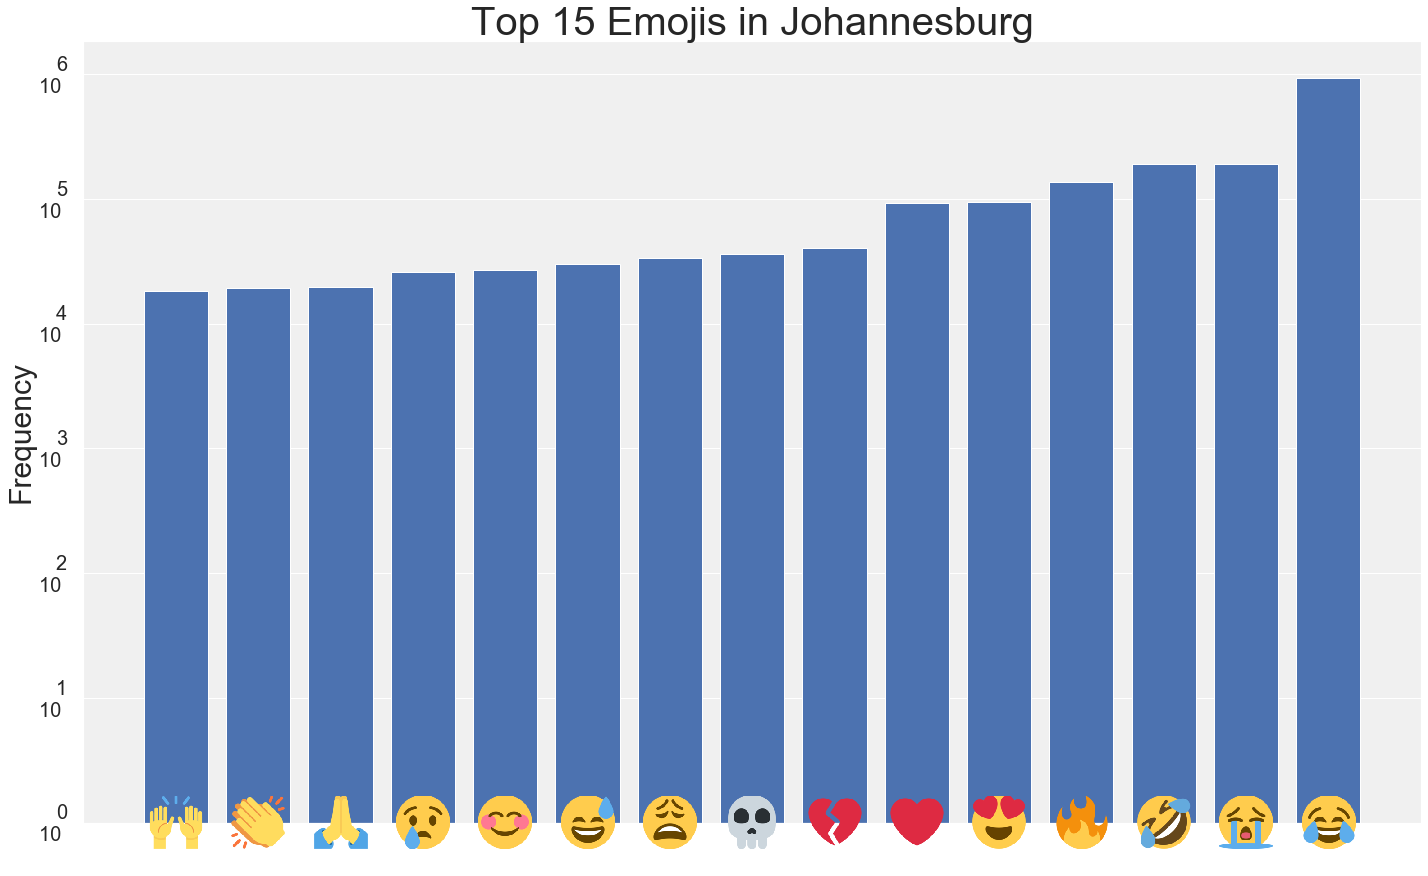

In [94]:
# Top 15 Values
x = emojis_count_df['Emoji'].tail(15).values
y = emojis_count_df['Count'].tail(15).values
y_log = np.log10(y.astype(int))

# Millions Formatter Function
def millions(x,pos):
    return '%1.1fK' % (x*1e-3)

# Power of 10 Formatter Function (y log scale bug, so i have created this formatter)
def pow10(x,pos):
    return "{:.0f}\n10 ".format(x)

# Power of 10 (1 d.p) Formatter Function (y log scale bug, so i have created this formatter)
def pow10_1dp(x,pos):
    return "{:.1f}\n10     ".format(x)

# Create a formatters
formatter_millions = FuncFormatter(millions)
formatter_pow10 = FuncFormatter(pow10)
formatter_pow10_1dp = FuncFormatter(pow10_1dp)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_pow10)
ax.tick_params(axis='both', which='major', pad=10)
ax.set_facecolor('#0F0F0F0F')
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center')
ax.get_xaxis().set_visible(False)
#plt.xticks(x, fontproperties=emojis_font)  Old method
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis in Johannesburg', fontsize =40)
plt.tight_layout()

# Set sizes of figure and images
ax_width = ax.get_window_extent().width
fig_width = fig.get_window_extent().width
fig_height = fig.get_window_extent().height
img_size = ax_width/(fig_width*len(x_linespace))
img_axs = [None for i in range(len(x_linespace))]

# Display emojis pngs on x-axis
for i in range(len(x)):
    loc = ax.transData.transform((x_linespace[i], 0))      # Optimize y manually 
    img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                               img_size, img_size], anchor='C')
    
    # Platform 5 = Twitter
    img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
    img_axs[i].axis("off")

plt.show()

## Extract, Count & Sort Emojis for females

In [70]:
# Count emojis (Gender Confidence =1)
count_females = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['gender'] == 'female')& (joh_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_females_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_females:
    emojis_count_females_df = emojis_count_females_df.append({'Emoji' : emoji , 'Count' : count_females[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_females_df = emojis_count_females_df.sort_values(by=['Count'])
emojis_count_females_df.tail(20)

,Emoji,Count
102,🙏,5215
57,👏,5315
371,😹,6339
279,♥,6492
41,🙄,6643
4,😘,6787
84,😅,6802
188,💃,6814
63,💕,8920
140,😢,10108


## Extract, Count & Sort Emojis for males

In [71]:
# Count emojis (Gender Confidence =1)
count_males = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['gender'] == 'male')& (joh_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_males_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_males:
    emojis_count_males_df = emojis_count_males_df.append({'Emoji' : emoji , 'Count' : count_males[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_males_df = emojis_count_males_df.sort_values(by=['Count'])
emojis_count_males_df.tail(20)

,Emoji,Count
15,👀,3969
37,👌,4014
97,🙏🏾,4113
201,🙌,4894
33,😢,4971
67,😊,5072
102,🙏,5186
49,🤔,5194
23,👏,5357
83,😩,5534


## Top 15 Emojis Graph by Gender

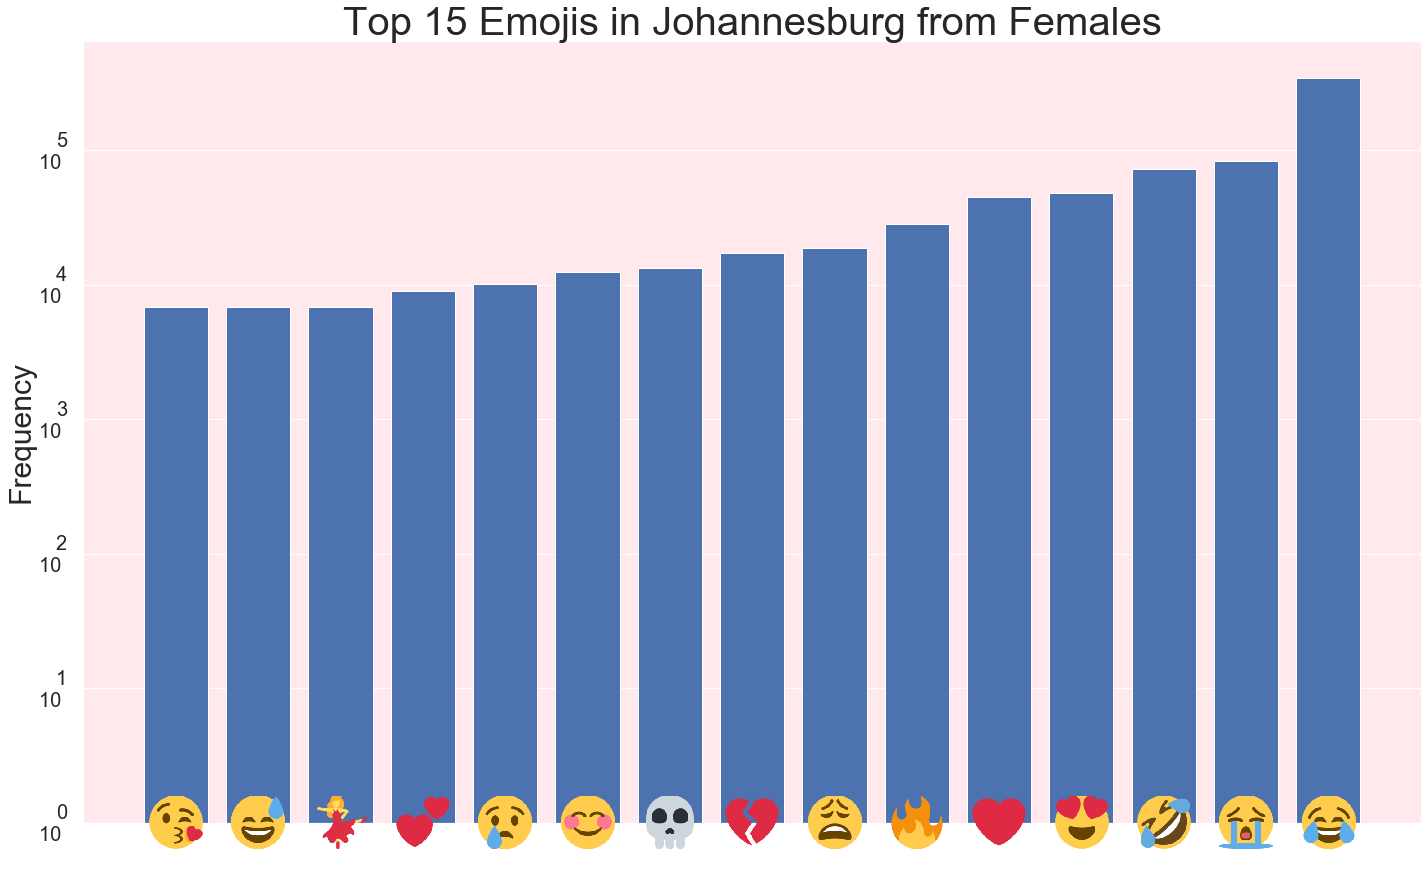

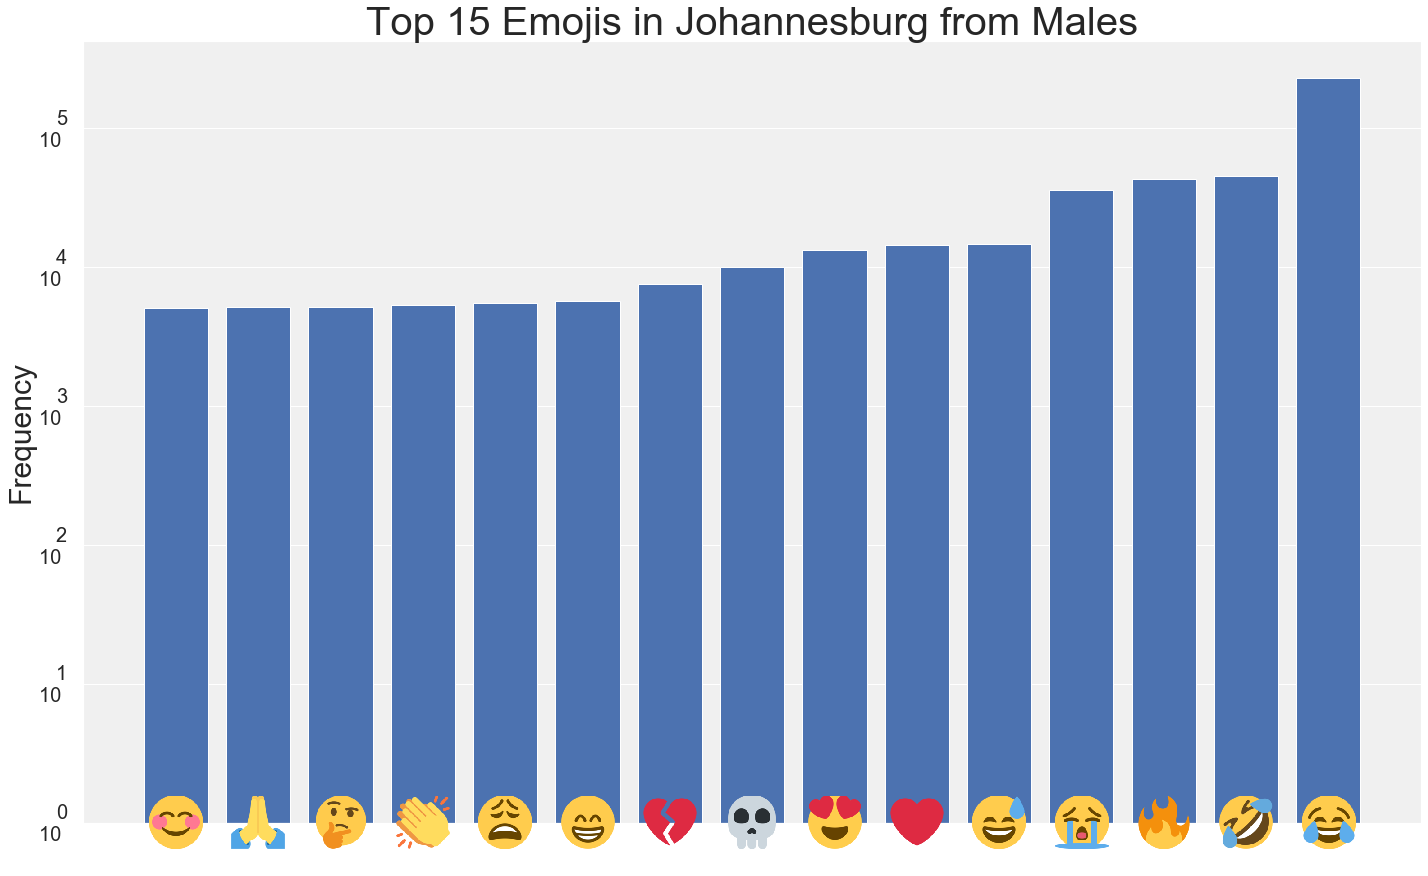

In [95]:
gender_list = ['Females','Males']
gender_values =[emojis_count_females_df,emojis_count_males_df]
gender_graph_colours=['ffe9ec','0F0F0F0F']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x = gender_values[ind]['Emoji'].tail(15).values
    y = gender_values[ind]['Count'].tail(15).values
    y_log = np.log10(y.astype(int))
    

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_pow10)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in Johannesburg from {}'.format(gender_list[ind]), fontsize =40)
    plt.tight_layout()

    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]


    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0)) # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

    plt.show()

## Extract, Count & Sort Emojis for White Ethnicity

In [75]:
# Count emojis (Ethnicity Confidence: 0.8)
count_white = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] == 'white')& (joh_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_white_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_white:
    emojis_count_white_df = emojis_count_white_df.append({'Emoji' : emoji , 'Count' : count_white[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_white_df = emojis_count_white_df.sort_values(by=['Count'])
emojis_count_white_df.tail(20)

,Emoji,Count
33,👍,394
28,🙄,402
31,🤔,407
4,😘,410
0,😁,459
7,😉,460
41,💔,462
139,😱,477
29,🙏,572
34,👏,579


## Extract, Count & Sort Emojis for Black Ethnicity

In [76]:
# Count emojis (Ethnicity Confidence: 0.8)
count_black = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] == 'black')& (joh_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_black_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_black:
    emojis_count_black_df = emojis_count_black_df.append({'Emoji' : emoji , 'Count' : count_black[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_black_df = emojis_count_black_df.sort_values(by=['Count'])
emojis_count_black_df.tail(20)

,Emoji,Count
20,🙄,8783
255,🙌,8963
132,🙏,9003
84,😁,9068
29,🤔,9236
48,👏,9890
47,💕,10320
243,😹,10811
65,😅,14919
58,😢,15159


## Extract, Count & Sort Emojis for Other and Hispanic Ethnicity

In [78]:
# Count emojis (Ethnicity Confidence: 0.75)
count_hispanic = extract.count_all_emoji(joh_join_df.loc[((joh_join_df['ethnicity'] == 'hispanic')|(joh_join_df['ethnicity'] == 'other'))& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_hispanic_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_hispanic:
    emojis_count_hispanic_df = emojis_count_hispanic_df.append({'Emoji' : emoji , 'Count' : count_hispanic[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_hispanic_df = emojis_count_hispanic_df.sort_values(by=['Count'])
emojis_count_hispanic_df.tail(20)

,Emoji,Count
97,😍,22
122,☹,23
43,👏,23
49,🙈,27
139,😣,33
51,🤦‍♂️,35
39,☺,36
82,😔,41
34,🙄,42
72,🔥,48


## Extract, Count & Sort Emojis for Asian Ethnicity

In [79]:
# Count emojis (Ethnicity Confidence: 0.75)
count_asian = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] == 'asian')& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_asian_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_asian:
    emojis_count_asian_df = emojis_count_asian_df.append({'Emoji' : emoji , 'Count' : count_asian[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_asian_df = emojis_count_asian_df.sort_values(by=['Count'])
emojis_count_asian_df.tail(20)

,Emoji,Count
27,💛,6
5,😁,6
17,💔,7
13,😄,9
22,👑,9
8,🤔,10
34,❤,11
7,😊,12
18,😔,12
39,👀,14


## Top 15 Emojis Graph by Ethnicity

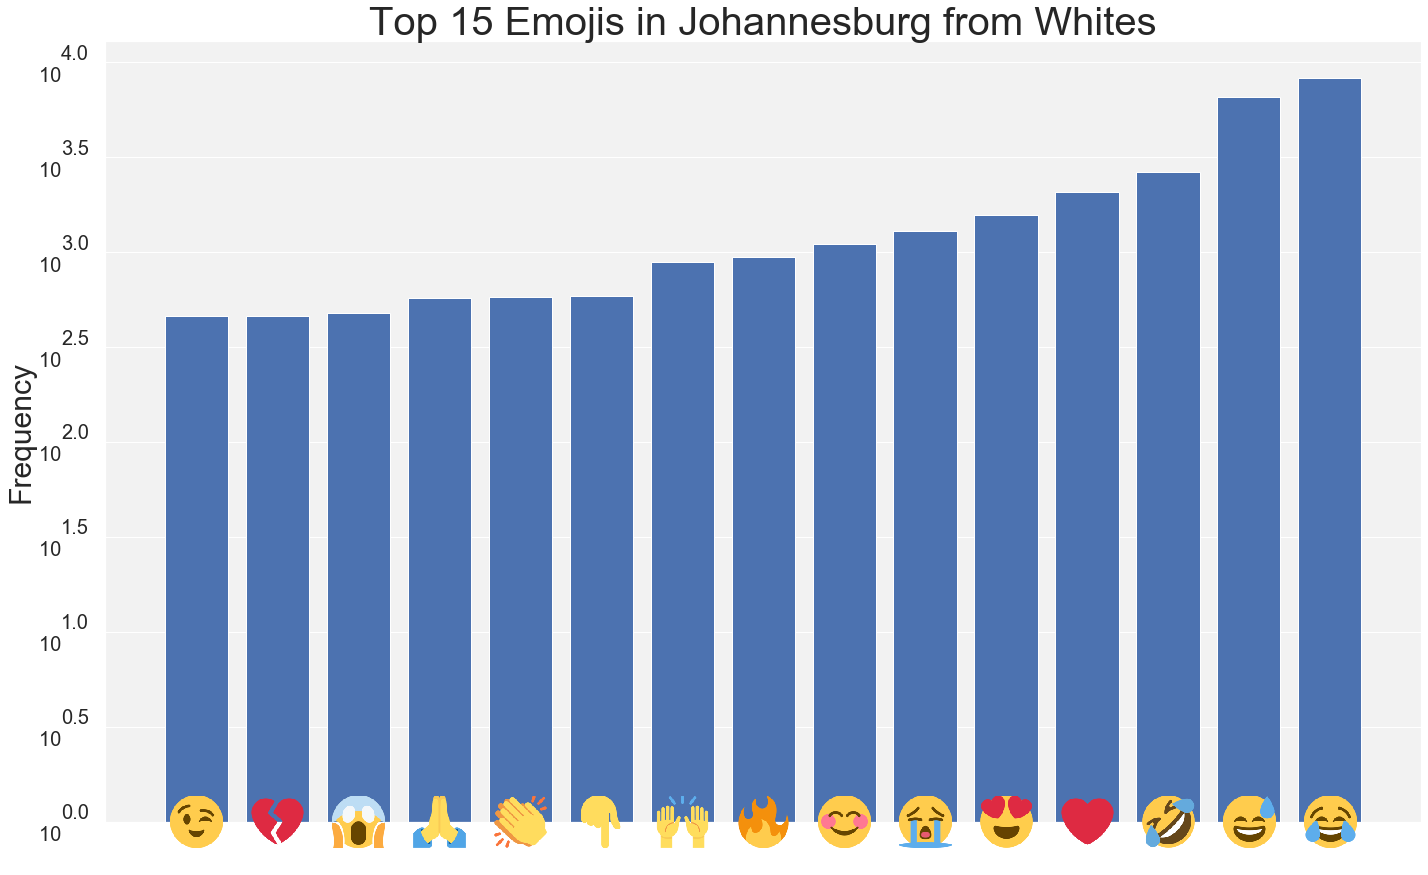

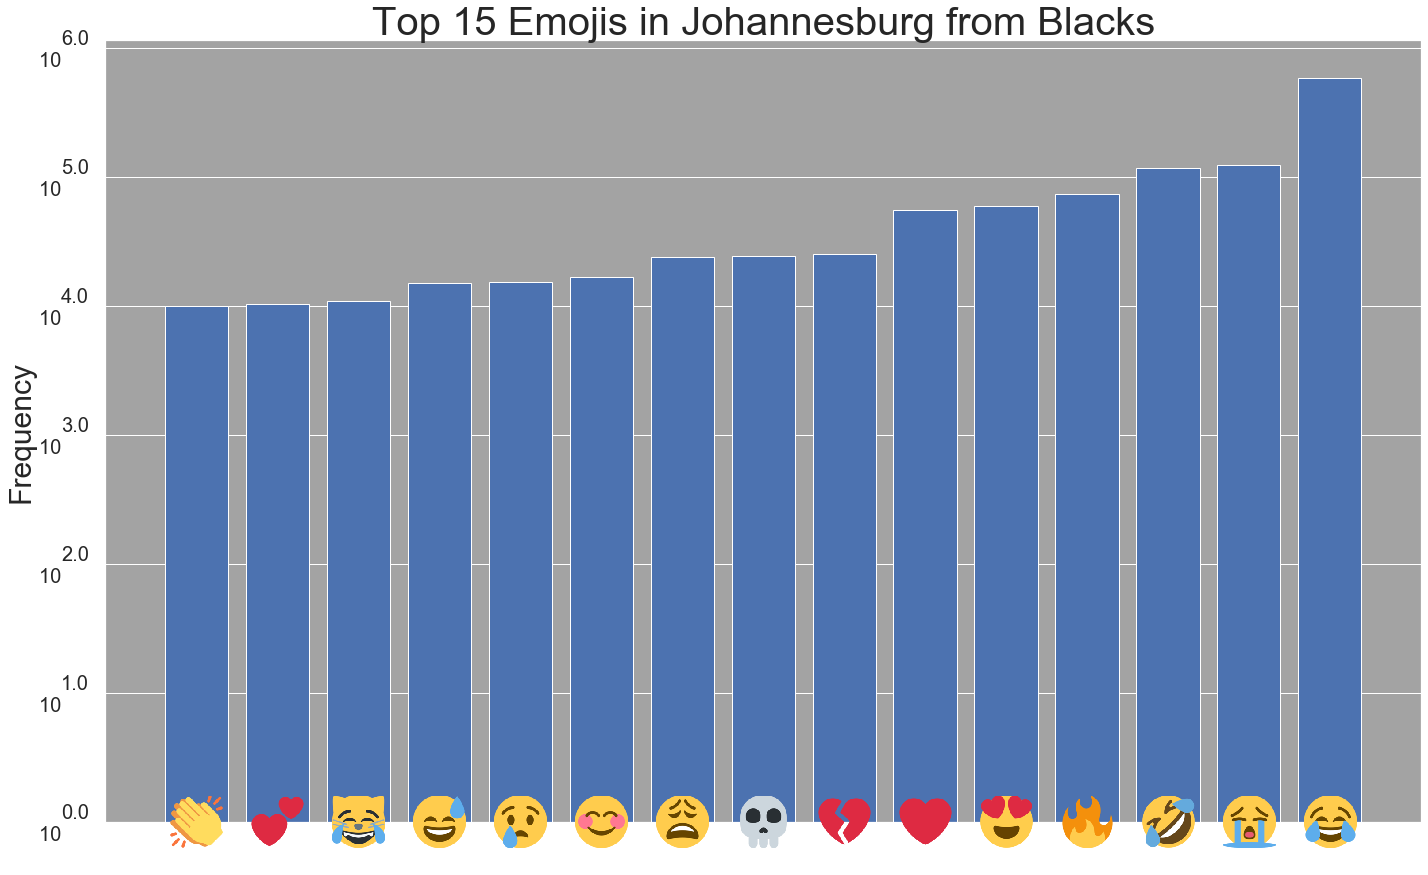

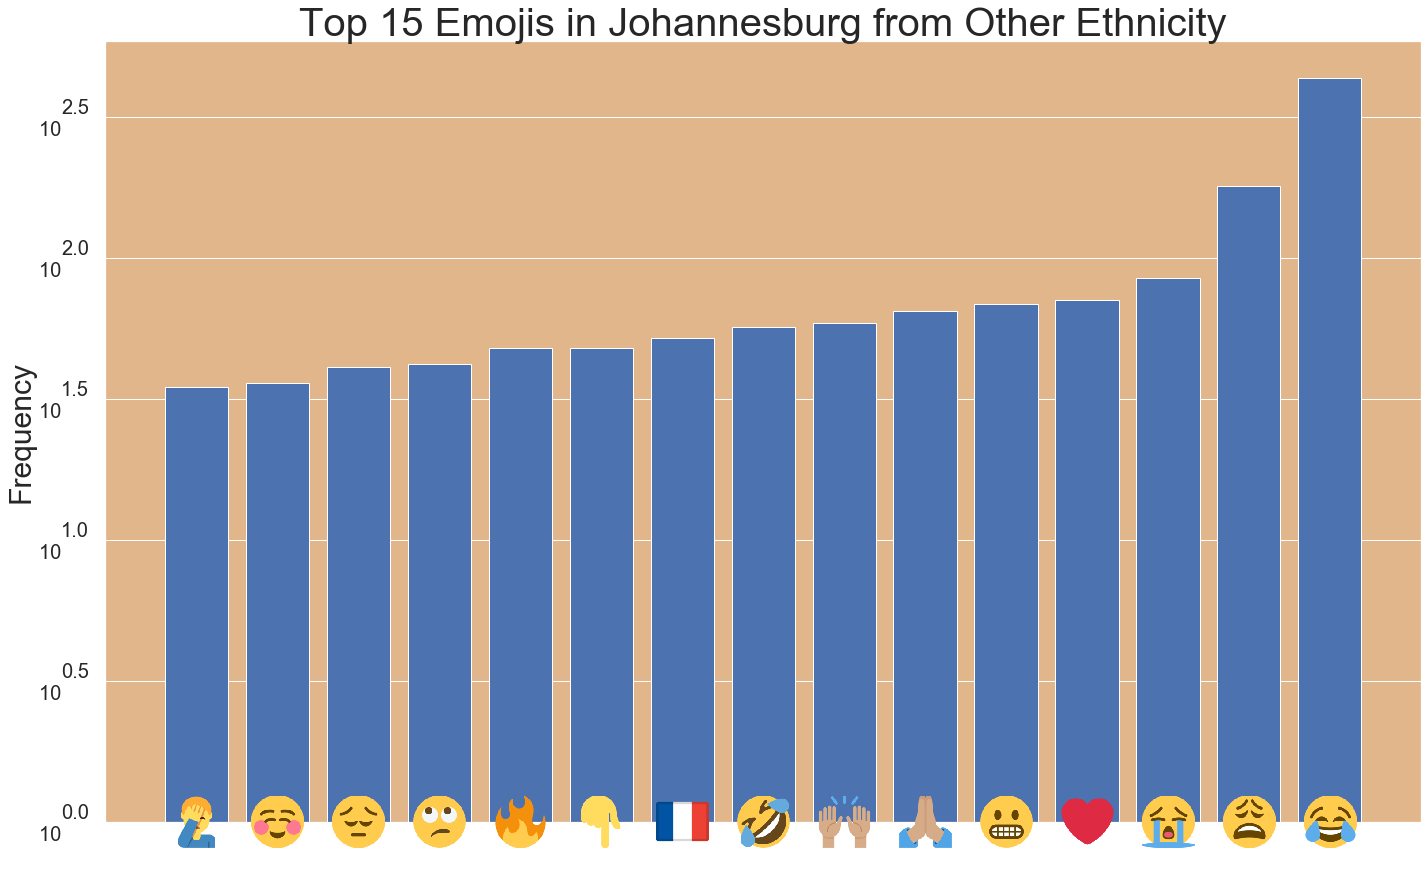

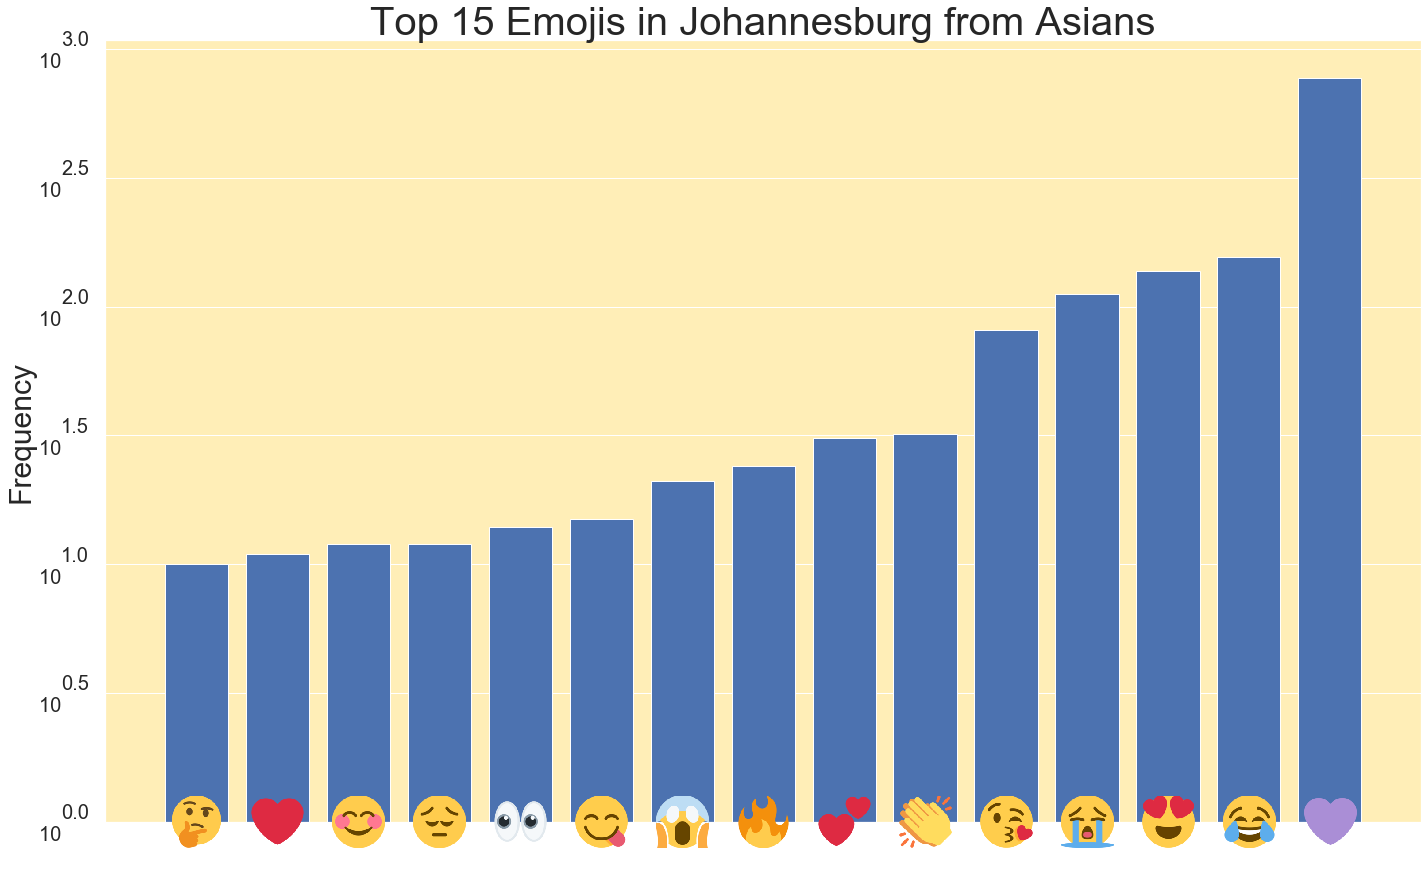

In [96]:
ethnicities_list = ['Whites','Blacks','Other Ethnicity','Asians']
ethnicities_values =[emojis_count_white_df,emojis_count_black_df,emojis_count_hispanic_df,emojis_count_asian_df]
ethnicities_graph_colours=['f2f2f2','a3a3a3','e1b68b','ffeeb7']

for ind,ethn in enumerate(ethnicities_list):

     # Top 15 Values
    x = ethnicities_values[ind]['Emoji'].tail(15).values
    y = ethnicities_values[ind]['Count'].tail(15).values
    y_log = np.log10(y.astype(int))

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_pow10_1dp)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(ethnicities_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in Johannesburg from {}'.format(ethnicities_list[ind]), fontsize =40)
    plt.tight_layout()

    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]


    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0)) # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

    plt.show()